In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv("df_train.csv")
data['path'] = 'data/' + data['path']

In [3]:
# Load the images
images = []
for file_path in data["path"]:
    img = image.load_img(file_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img /= 255.0
    images.append(img)
images = np.array(images)

In [32]:
# Get the target values
y = data["CD79B"].values
#normalise the values

print(y)

[ 85.88150334  84.03808723  82.92790666  93.96033596 113.96853588
  92.85711068  92.9590688   85.33098088 124.19138963  99.03002807
 119.71361071 103.82388314  58.55557046  68.77955895  72.29820434
  78.94605547  65.46838086  54.88667507 171.14067694  80.2957145
 101.65897649  95.4238926   76.25391417  71.56791945  65.39827122
 101.38788588 100.91076642  72.09031302  86.72347886  75.33465205
  77.41019859  76.23539246 100.19508723  71.56791945  85.88150334
  81.79190794 135.30809771 131.06414164 137.5591179   84.34790506
  65.3446221   87.22340183 148.24783314 115.43212814 116.2978691
  75.77779706  94.33953018  84.98690434  98.11730892 144.36976854
 151.72398923  92.44189595  95.4238926  120.95986386 122.41880958
  71.56791945  54.07353914  81.20206245 107.75394614 116.91788821
  90.03705995  84.72983567  78.92078788  78.38391178  74.92266567
  81.97779864  85.15676491 107.35187917  93.58881774  95.5778021
 123.32325103  96.89195248  64.49948296 119.27986575  92.22670032
 133.46449843

In [33]:
# Split the data into train and test sets
x_train, x_val, y_train, y_val = train_test_split(images, y, test_size=0.3, random_state=200)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=200)

In [34]:
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [36]:
# Train the model
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_val, y_val), callbacks=[reduce_lr])

Epoch 1/1000
3/3 [==============================] - 1s 102ms/step - loss: 8555.0059 - mean_squared_error: 8555.0059 - val_loss: 1502.4169 - val_mean_squared_error: 1502.4169 - lr: 0.0010
Epoch 2/1000
3/3 [==============================] - 0s 31ms/step - loss: 3078.5327 - mean_squared_error: 3078.5327 - val_loss: 439.4548 - val_mean_squared_error: 439.4548 - lr: 0.0010
Epoch 3/1000
3/3 [==============================] - 0s 31ms/step - loss: 1102.7731 - mean_squared_error: 1102.7731 - val_loss: 1277.6041 - val_mean_squared_error: 1277.6041 - lr: 0.0010
Epoch 4/1000
3/3 [==============================] - 0s 31ms/step - loss: 1323.0161 - mean_squared_error: 1323.0161 - val_loss: 675.5731 - val_mean_squared_error: 675.5731 - lr: 0.0010
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 1064.6298 - mean_squared_error: 1064.6298 - val_loss: 559.3470 - val_mean_squared_error: 559.3470 - lr: 0.0010
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 67

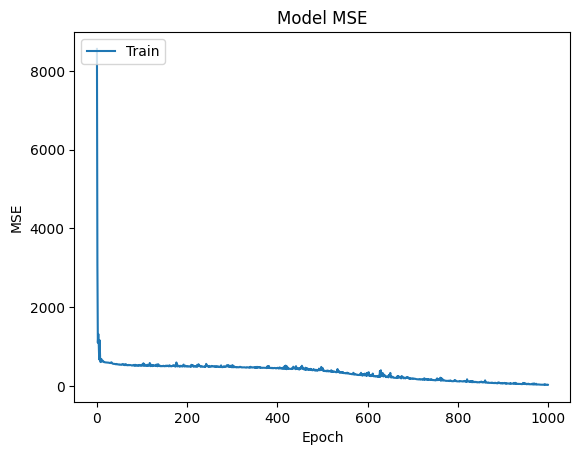

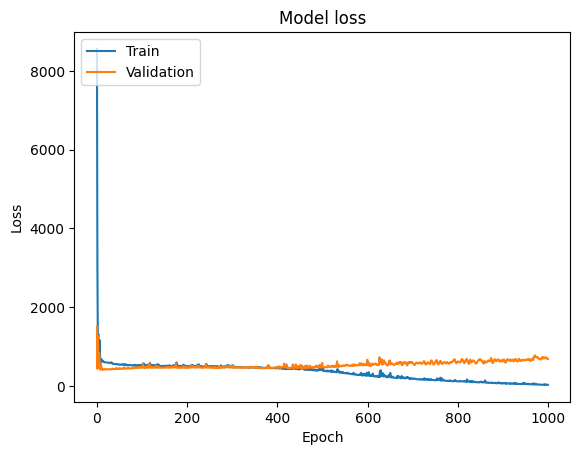

In [43]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
predictions = model.predict(x_test)

1/1 [==============================] - 0s 31ms/step


In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)
print(predictions)
print(y_test)

[[ 58.929024]
 [ 98.29502 ]
 [120.15756 ]
 [ 91.71222 ]
 [ 87.47357 ]
 [103.004105]
 [ 96.53703 ]
 [ 81.38265 ]
 [ 58.506443]]
[ 86.72347886 137.5591179   64.49948296  54.88667507  85.88150334
 115.43212814  94.33953018  68.77955895  89.69845904]


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

-0.5290826703699967

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

24.394986627541687

In [42]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, predictions)

27.794455118040403